# [Huggingface Transformer란?](https://huggingface.co/docs/transformers/index)

- 인공신경망 알고리즘은 크게, 합성곱 신경망(CNN), 순환 신경망(RNN), 트랜스포머(Transformer) 3가지로 나눠집니다.
- 이 중 트랜스포머는, 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로,
- 셀프 에텐션(Self-Attention)이라는 방식을 사용하는 모델입니다.
- 트랜스포머는, 이러한 어텐션 방식을 사용해, 문장 전체를 병렬구조로 번역할 뿐만 아니라, 멀리 있는 단어까지도 연관성을 만들어 유사성을 높였으며, RNN의 한계를 극복했습니다.
- 또한, 이미지나 언어 번역에 폭넓게 쓰이고 있으며, GPT-3, BERT 등이 가장 관심을 많이 받고 있는 모델입니다.

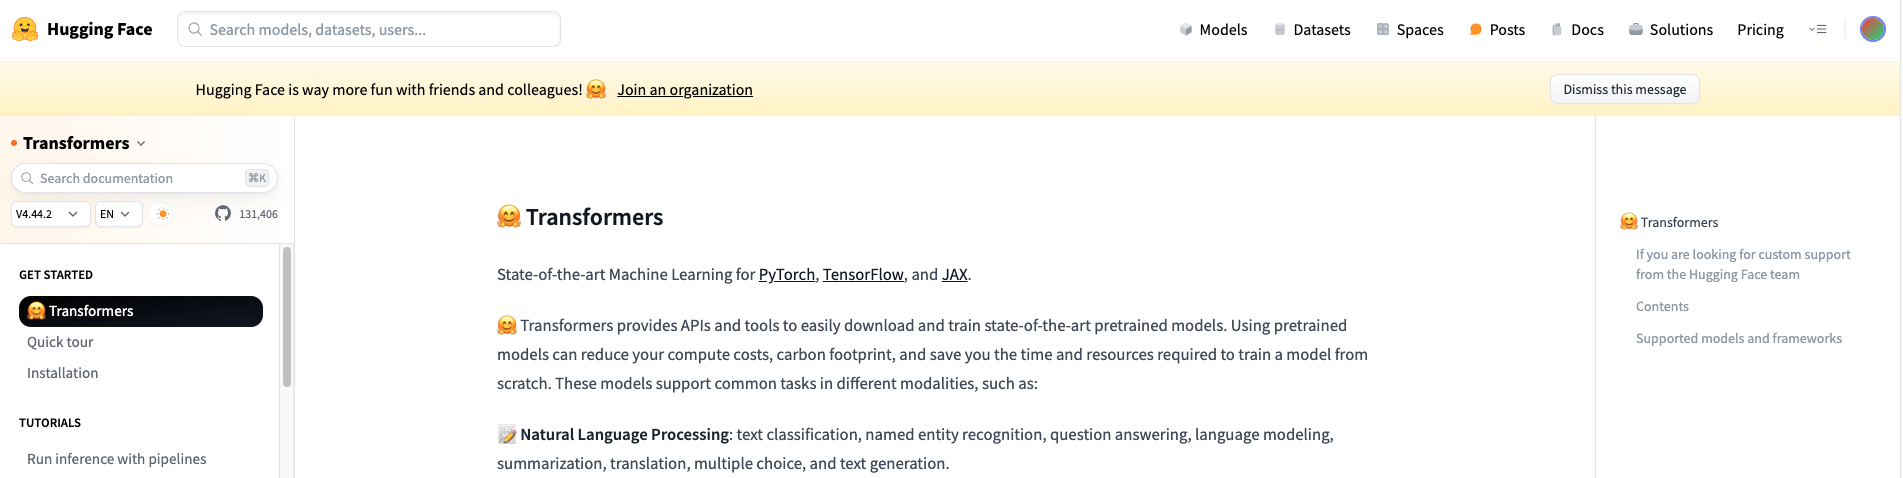

### transformers.models
- 트랜스포머 기반의 다양한 모델을 pytorch, tensorflow 로 각각 구현해놓은 모듈입니다.
- 각 모델에 맞는 tokenizer 도 구현되어 있습니다.

### transformers.Trainer
- 딥러닝 학습 및 평가에 필요한 optimizer, weight updt, learning rate schedul, ckpt, tensorbord, evaluation 등을 수행하는 모듈입니다.
- Trainer.train 함수를 호출하면, 이 모든 과정이, 사용자가 원하는 arguments에 맞게 실행됩니다.
- pytorch lightning 과 비슷하게, 공통적으로 사용되는 학습 스크립트를 모듈화 하여 편하게 사용할 수 있다는 점이 장점입니다.

### 설치

In [ ]:
!pip install transformers

# [Transformer Model](https://huggingface.co/docs/transformers/main_classes/model)
- `인코더(Encoder) (왼쪽)`: 인코더는 입력에 대한 표현(representation) 혹은 자질(feature)을 도출합니다. 이는 모델이 입력으로부터 이해를 얻도록(acquire understanding from the input), 다시 말해서, 최종 목적 태스크를 위해서 입력에 대한 표현 형태가 최적화되었음을 의미합니다.
- `디코더(Decoder) (오른쪽)`: 디코더는 인코더가 구성한 표현(representation) 혹은 자질(feature)을 다른 입력과 함께 사용하여 대상 시퀀스를 생성합니다. 이는 모델이 출력 생성(generating outputs)에 최적화되어 있음을 의미합니다.

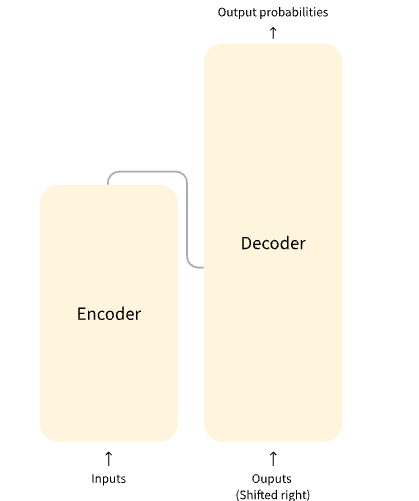

- Transformer 모델이 고수준(high-level)에서 어떻게 작동하는지 논의하고 전이 학습(transfer learning)과 미세 조정(fine-tuning)의 중요성에 대해 이야기했습니다.
- 가장 중요한 핵심은 대상 작업의 종류에 따라 전체 아키텍처(full architecture)를 사용하거나 인코더(encoder) 또는 디코더(decoder)만 사용할 수 있다는 것입니다.

다음 표는 이를 요약한 것입니다.

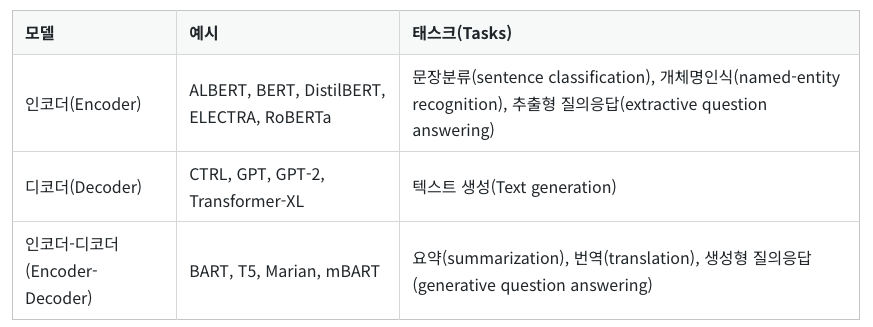

## Encoder Models
- `인코더 전용 모델(Encoder-only models)`: 문장 분류(sentence classification) 및 개체명 인식(named-entity recognition)과 같이 입력에 대한 분석 및 이해(understanding)가 필요한 태스크에 적합합니다.

### [ALBERT](https://huggingface.co/docs/transformers/model_doc/albert#albert)

- [AlbertModel](https://huggingface.co/docs/transformers/model_doc/albert#transformers.AlbertModel)

In [ ]:
from transformers import AutoTokenizer, AlbertModel
import torch

tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AlbertModel.from_pretrained("albert/albert-base-v2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
last_hidden_states

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

tensor([[[ 1.3997,  1.5700,  0.3336,  ..., -0.0686,  0.2804,  0.8287],
         [ 0.3306,  0.3647,  0.7145,  ..., -0.5266,  1.2512, -0.7154],
         [ 1.1538,  0.6781, -1.6579,  ...,  0.6821,  0.3878,  0.4889],
         ...,
         [ 1.5001, -0.4411,  1.2422,  ...,  1.3102,  0.0211, -1.0564],
         [ 0.4044, -0.0901,  1.0914,  ...,  0.4799,  0.6582, -1.0785],
         [ 0.0455,  0.1439, -0.0616,  ..., -0.0906,  0.1141,  0.2033]]],
       grad_fn=<NativeLayerNormBackward0>)

- [AlbertForPreTraining](https://huggingface.co/docs/transformers/model_doc/albert#transformers.AlbertForPreTraining)

In [ ]:
from transformers import AutoTokenizer, AlbertForPreTraining
import torch

tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AlbertForPreTraining.from_pretrained("albert/albert-base-v2")

input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)
# Batch size 1
outputs = model(input_ids)

prediction_logits = outputs.prediction_logits
sop_logits = outputs.sop_logits
sop_logits

Some weights of AlbertForPreTraining were not initialized from the model checkpoint at albert/albert-base-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[0.1787, 0.5331]], grad_fn=<AddmmBackward0>)

- [AlbertForMaskedLM](https://huggingface.co/docs/transformers/model_doc/albert#transformers.AlbertForMaskedLM)

In [ ]:
import torch
from transformers import AutoTokenizer, AlbertForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")
model = AlbertForMaskedLM.from_pretrained("albert/albert-base-v2")

# add mask_token
inputs = tokenizer("The capital of [MASK] is Paris.", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

# retrieve index of [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
print(f"result > {tokenizer.decode(predicted_token_id)}")

Some weights of the model checkpoint at albert/albert-base-v2 were not used when initializing AlbertForMaskedLM: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


result > france


In [ ]:
labels = tokenizer("The capital of France is Paris.", return_tensors="pt")["input_ids"]
labels = torch.where(inputs.input_ids == tokenizer.mask_token_id, labels, -100)
outputs = model(**inputs, labels=labels)
print(f"정답일 확률 > {round(outputs.loss.item(), 2)}")

정답일 확률 > 0.81


### [BERT](https://huggingface.co/docs/transformers/model_doc/bert#bert)

- [BertModel](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel)

In [ ]:
from transformers import AutoTokenizer, BertModel
import torch

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertModel.from_pretrained("google-bert/bert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
last_hidden_states

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tensor([[[-0.1144,  0.1937,  0.1250,  ..., -0.3827,  0.2107,  0.5407],
         [ 0.5308,  0.3207,  0.3665,  ..., -0.0036,  0.7579,  0.0388],
         [-0.4877,  0.8849,  0.4256,  ..., -0.6976,  0.4458,  0.1231],
         ...,
         [-0.7003, -0.1815,  0.3297,  ..., -0.4838,  0.0680,  0.8901],
         [-1.0355, -0.2567, -0.0317,  ...,  0.3197,  0.3999,  0.1795],
         [ 0.6080,  0.2610, -0.3131,  ...,  0.0311, -0.6283, -0.1994]]],
       grad_fn=<NativeLayerNormBackward0>)

- [BertForPreTraining](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForPreTraining)

In [ ]:
from transformers import AutoTokenizer, BertForPreTraining
import torch

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForPreTraining.from_pretrained("google-bert/bert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

prediction_logits = outputs.prediction_logits
seq_relationship_logits = outputs.seq_relationship_logits
seq_relationship_logits

tensor([[ 3.3474, -2.0613]], grad_fn=<AddmmBackward0>)

- [BertLMHeadModel](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertLMHeadModel)

In [ ]:
import torch
from transformers import AutoTokenizer, BertLMHeadModel

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertLMHeadModel.from_pretrained("google-bert/bert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])
loss = outputs.loss
logits = outputs.logits
logits

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


tensor([[[ -7.8962,  -7.8105,  -7.7903,  ...,  -7.0694,  -7.1693,  -4.3590],
         [ -8.4461,  -8.4401,  -8.5044,  ...,  -8.0625,  -7.9909,  -5.7160],
         [-15.2953, -15.4727, -15.5865,  ..., -12.9857, -11.7038, -11.4293],
         ...,
         [-14.0628, -14.2535, -14.3645,  ..., -12.7151, -11.1621, -10.2317],
         [-10.6576, -10.7892, -11.0402,  ..., -10.3233, -10.1578,  -3.7721],
         [-11.3383, -11.4590, -11.1767,  ...,  -9.2152,  -9.5209,  -9.5571]]],
       grad_fn=<ViewBackward0>)

- [BertForMaskedLM](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForMaskedLM)

In [ ]:
from transformers import AutoTokenizer, BertForMaskedLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

inputs = tokenizer("The capital of France is [MASK].", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# retrieve index of [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)
tokenizer.decode(predicted_token_id)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'paris'

In [ ]:
labels = tokenizer("The capital of France is Paris.", return_tensors="pt")["input_ids"]
# mask labels of non-[MASK] tokens
labels = torch.where(inputs.input_ids == tokenizer.mask_token_id, labels, -100)

outputs = model(**inputs, labels=labels)
round(outputs.loss.item(), 2)

0.88

### [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert)

- [DistilBertModel](https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertModel)

In [ ]:
from transformers import AutoTokenizer, DistilBertModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
last_hidden_states

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tensor([[[-1.8296e-01, -7.4054e-02,  5.0267e-02,  ..., -1.1261e-01,
           4.4493e-01,  4.0941e-01],
         [ 7.0661e-04,  1.4825e-01,  3.4328e-01,  ..., -8.6040e-02,
           6.9475e-01,  4.3353e-02],
         [-5.0721e-01,  5.3085e-01,  3.7163e-01,  ..., -5.6287e-01,
           1.3756e-01,  2.8475e-01],
         ...,
         [-4.2251e-01,  5.7315e-02,  2.4338e-01,  ..., -1.5223e-01,
           2.4462e-01,  6.4155e-01],
         [-4.9384e-01, -1.8895e-01,  1.2641e-01,  ...,  6.3240e-02,
           3.6913e-01, -5.8252e-02],
         [ 8.3269e-01,  2.4948e-01, -4.5439e-01,  ...,  1.1998e-01,
          -3.9257e-01, -2.7785e-01]]], grad_fn=<NativeLayerNormBackward0>)

- [DistilBertForMaskedLM](https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertForMaskedLM)

In [ ]:
from transformers import AutoTokenizer, DistilBertForMaskedLM
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForMaskedLM.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("The capital of France is [MASK].", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# retrieve index of [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)

labels = tokenizer("The capital of France is Paris.", return_tensors="pt")["input_ids"]
# mask labels of non-[MASK] tokens
labels = torch.where(inputs.input_ids == tokenizer.mask_token_id, labels, -100)

outputs = model(**inputs, labels=labels)
outputs

MaskedLMOutput(loss=tensor(2.4513, grad_fn=<NllLossBackward0>), logits=tensor([[[ -5.4885,  -5.4923,  -5.5315,  ...,  -4.8746,  -4.7521,  -2.8670],
         [-13.7576, -14.1974, -13.9020,  ..., -11.3393, -10.9795, -13.7729],
         [ -8.2660,  -8.8192,  -8.5549,  ...,  -7.4754,  -6.4735, -11.5095],
         ...,
         [ -3.5587,  -3.8017,  -3.4940,  ...,  -2.6647,  -3.3341,  -3.5946],
         [-10.0687,  -9.9196, -10.1045,  ...,  -8.7639,  -8.8426,  -5.2510],
         [-11.0465, -11.2401, -11.2284,  ..., -10.2046, -10.4142,  -6.8991]]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)

## Decoder Models
- `디코더 전용 모델(Decoder-only models)`: 텍스트 생성(text generation) 등과 같은 생성 태스크(generative tasks)에 좋습니다.

### [CTRL](https://huggingface.co/docs/transformers/model_doc/ctrl)

- [CTRLModel](https://huggingface.co/docs/transformers/model_doc/ctrl#transformers.CTRLModel)

In [ ]:
from transformers import AutoTokenizer, CTRLModel
import torch

tokenizer = AutoTokenizer.from_pretrained("Salesforce/ctrl")
model = CTRLModel.from_pretrained("Salesforce/ctrl")

# CTRL was trained with control codes as the first token
inputs = tokenizer("Opinion My dog is cute", return_tensors="pt")
assert inputs["input_ids"][0, 0].item() in tokenizer.control_codes.values()

outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/2.26M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.55G [00:00<?, ?B/s]

[1, 5, 1280]

- [CTRLLMHeadModel](https://huggingface.co/docs/transformers/model_doc/ctrl#transformers.CTRLLMHeadModel)

In [ ]:
import torch
from transformers import AutoTokenizer, CTRLLMHeadModel

tokenizer = AutoTokenizer.from_pretrained("Salesforce/ctrl")
model = CTRLLMHeadModel.from_pretrained("Salesforce/ctrl")

# CTRL was trained with control codes as the first token
inputs = tokenizer("Wikipedia The llama is", return_tensors="pt")
assert inputs["input_ids"][0, 0].item() in tokenizer.control_codes.values()

sequence_ids = model.generate(inputs["input_ids"])
sequences = tokenizer.batch_decode(sequence_ids)
sequences

outputs = model(**inputs, labels=inputs["input_ids"])
round(outputs.loss.item(), 2)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


9.21

In [ ]:
list(outputs.logits.shape)

[1, 5, 246534]

- [CTRLForSequenceClassification](https://huggingface.co/docs/transformers/model_doc/ctrl#transformers.CTRLForSequenceClassification)

In [ ]:
import torch
from transformers import AutoTokenizer, CTRLForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Salesforce/ctrl")
model = CTRLForSequenceClassification.from_pretrained("Salesforce/ctrl")

# CTRL was trained with control codes as the first token
inputs = tokenizer("Opinion My dog is cute", return_tensors="pt")
assert inputs["input_ids"][0, 0].item() in tokenizer.control_codes.values()

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

Some weights of CTRLForSequenceClassification were not initialized from the model checkpoint at Salesforce/ctrl and are newly initialized: ['classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'LABEL_0'

In [ ]:
import torch

torch.manual_seed(42)
# To train a model on `num_labels` classes, you can pass `num_labels=num_labels` to `.from_pretrained(...)`
num_labels = len(model.config.id2label)
model = CTRLForSequenceClassification.from_pretrained("Salesforce/ctrl", num_labels=num_labels)

labels = torch.tensor(1)
loss = model(**inputs, labels=labels).loss
round(loss.item(), 2)

Some weights of CTRLForSequenceClassification were not initialized from the model checkpoint at Salesforce/ctrl and are newly initialized: ['classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.93

### [GPT2](https://huggingface.co/docs/transformers/model_doc/gpt2)

- [GPT2Model](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2Model)

In [ ]:
from transformers import AutoTokenizer, GPT2Model
import torch

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2Model.from_pretrained("openai-community/gpt2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
last_hidden_states

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

tensor([[[-9.9069e-06, -1.4021e-01, -2.0845e-01,  ..., -1.5329e-01,
          -6.7826e-02, -1.9630e-01],
         [ 4.1949e-01,  2.3525e-01,  3.4816e-01,  ...,  4.5321e-02,
           1.5447e-01,  1.9546e-02],
         [-7.0055e-02,  2.6082e-01, -2.9146e-01,  ...,  9.0978e-02,
           4.9659e-01, -4.1824e-01],
         [-1.9695e-01, -2.9247e-01, -1.4120e-01,  ..., -8.9255e-02,
          -2.2392e-01,  1.2212e-01],
         [-6.4193e-01, -1.0236e-01, -4.2129e-01,  ...,  6.8697e-02,
          -5.1117e-01,  5.0044e-01],
         [ 4.1293e-03, -3.1455e-02, -1.0823e+00,  ..., -5.0159e-02,
          -3.0878e-02,  4.3480e-01]]], grad_fn=<ViewBackward0>)

- [GPT2LMHeadModel](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel)

In [ ]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2LMHeadModel.from_pretrained("openai-community/gpt2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])
loss = outputs.loss
logits = outputs.logits
logits

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tensor([[[ -35.2362,  -35.3265,  -38.9753,  ...,  -44.4645,  -43.9974,
           -36.4580],
         [-112.6171, -114.5832, -116.5725,  ..., -119.0128, -118.8059,
          -111.6918],
         [ -88.7435,  -89.8644,  -93.1977,  ...,  -92.3839,  -96.1782,
           -92.1273],
         [ -85.1647,  -88.3380,  -92.8703,  ...,  -99.8017,  -94.7657,
           -90.9330],
         [-116.7281, -119.3949, -121.7259,  ..., -129.1003, -124.6102,
          -121.6092],
         [ -77.4425,  -80.4463,  -88.0498,  ...,  -96.2564,  -93.6345,
           -84.0666]]], grad_fn=<UnsafeViewBackward0>)

- [GPT2ForQuestionAnswering](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2ForQuestionAnswering)

In [ ]:
from transformers import AutoTokenizer, GPT2ForQuestionAnswering
import torch

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = GPT2ForQuestionAnswering.from_pretrained("openai-community/gpt2")

question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]

# target is "nice puppet"
target_start_index = torch.tensor([14])
target_end_index = torch.tensor([15])

outputs = model(**inputs, start_positions=target_start_index, end_positions=target_end_index)
loss = outputs.loss
loss

Some weights of GPT2ForQuestionAnswering were not initialized from the model checkpoint at openai-community/gpt2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor(nan, grad_fn=<DivBackward0>)

## Sequence-to-sequence Models
- `인코더-디코더 모델(Encoder-Decoder models) 혹은 시퀀스-투-시퀀스 모델(sequence-to-sequence model)`: 번역(translation)이나 요약(summarization)과 같이 입력이 수반되는 생성 태스크(generative tasks)에 적합합니다.

### [MarianMT](https://huggingface.co/docs/transformers/model_doc/marian)

- [MarianModel](https://huggingface.co/docs/transformers/model_doc/marian#transformers.MarianModel)

In [ ]:
from transformers import AutoTokenizer, MarianModel

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-de")
model = MarianModel.from_pretrained("Helsinki-NLP/opus-mt-en-de")

inputs = tokenizer("Studies have been shown that owning a dog is good for you", return_tensors="pt")
decoder_inputs = tokenizer(
    "<pad> Studien haben gezeigt dass es hilfreich ist einen Hund zu besitzen",
    return_tensors="pt",
    add_special_tokens=False,
)
outputs = model(input_ids=inputs.input_ids, decoder_input_ids=decoder_inputs.input_ids)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

[1, 26, 512]

- [MarianMTModel](https://huggingface.co/docs/transformers/model_doc/marian#transformers.MarianMTModel)

In [ ]:
from transformers import AutoTokenizer, MarianMTModel

src = "fr"  # source language
trg = "en"  # target language

model_name = f"Helsinki-NLP/opus-mt-{src}-{trg}"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

sample_text = "où est l'arrêt de bus ?"
batch = tokenizer([sample_text], return_tensors="pt")

generated_ids = model.generate(**batch)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

"Where's the bus stop?"

- [MarianForCausalLM](https://huggingface.co/docs/transformers/model_doc/marian#transformers.MarianForCausalLM)

In [ ]:
from transformers import AutoTokenizer, MarianForCausalLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
model = MarianForCausalLM.from_pretrained("Helsinki-NLP/opus-mt-fr-en", add_cross_attention=False)
assert model.config.is_decoder, f"{model.__class__} has to be configured as a decoder."
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

logits = outputs.logits
expected_shape = [1, inputs.input_ids.shape[-1], model.config.vocab_size]
list(logits.shape) == expected_shape

True

### [T5](https://huggingface.co/docs/transformers/model_doc/t5)

- [T5Model](https://huggingface.co/docs/transformers/model_doc/t5#transformers.T5Model)

In [ ]:
from transformers import AutoTokenizer, T5Model

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = T5Model.from_pretrained("google-t5/t5-small")

input_ids = tokenizer(
    "Studies have been shown that owning a dog is good for you", return_tensors="pt"
).input_ids  # Batch size 1
decoder_input_ids = tokenizer("Studies show that", return_tensors="pt").input_ids  # Batch size 1

# preprocess: Prepend decoder_input_ids with start token which is pad token for T5Model.
# This is not needed for torch's T5ForConditionalGeneration as it does this internally using labels arg.
decoder_input_ids = model._shift_right(decoder_input_ids)

# forward pass
outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids)
last_hidden_states = outputs.last_hidden_state
last_hidden_states

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

tensor([[[ 1.1526e-01,  1.1089e-01, -5.7172e-03,  ..., -4.8241e-03,
           4.1763e-04, -9.3368e-02],
         [ 8.7898e-02,  1.3796e-01, -3.2149e-02,  ...,  5.5419e-02,
           7.1102e-04, -6.8268e-03],
         [ 1.1366e-01,  6.3738e-02,  2.5221e-03,  ..., -4.4384e-02,
           3.6734e-05, -7.4255e-02],
         [ 2.0824e-01, -1.9028e-03,  1.0753e-01,  ..., -5.9003e-02,
           8.2739e-04,  4.5031e-03]]], grad_fn=<MulBackward0>)

- [T5ForConditionalGeneration](https://huggingface.co/docs/transformers/model_doc/t5#transformers.T5ForConditionalGeneration)

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-small")

# training
input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids
outputs = model(input_ids=input_ids, labels=labels)
loss = outputs.loss
logits = outputs.logits

# inference
input_ids = tokenizer(
    "summarize: studies have shown that owning a dog is good for you", return_tensors="pt"
).input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

studies have shown that owning a dog is good for you.


# [Transformer Pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines)

## [주요 파라미터](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline)

- `task`: The task defining which pipeline will be returned.
  - "text-generation", "audio-classification", "image-to-text" 등
- `model`: The model that will be used by the pipeline to make predictions.
- `config(optional)`: The configuration that will be used by the pipeline to instantiate the model.
- `tokenizer(optional)`: The tokenizer that will be used by the pipeline to encode data for the model.

## [Pipeline 내부 프로세스](https://wikidocs.net/166795)
- 파이프라인은 전처리(preprocessing), 모델로 입력 전달 및 후처리(postprocessing)의 3단계를 한번에 실행합니다.

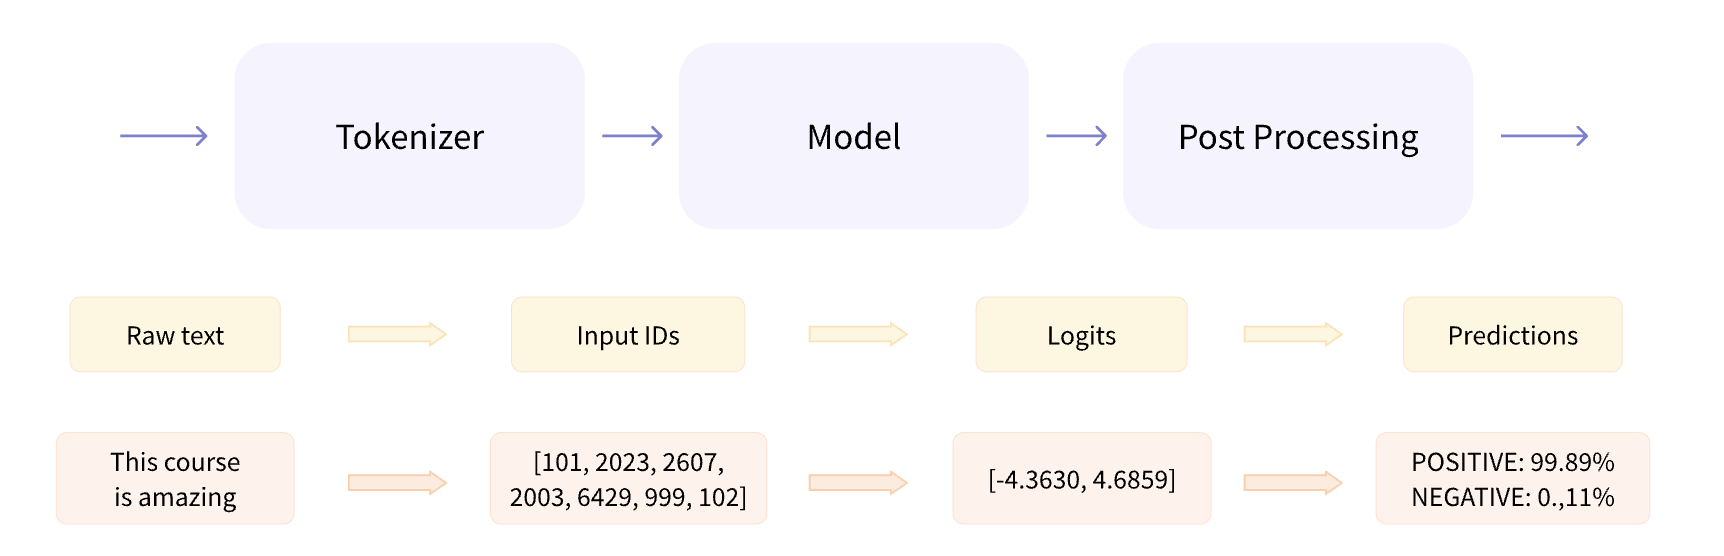

### Tokenizer

#### 단어 기반 토큰화 (Word-based Tokenization)
- 가장 먼저 생각할 수 있는 토큰화(tokenization) 형태는 단어기반 (word-based) 입니다.
- 일반적으로 몇 가지 규칙만 가지고도 설정 및 사용이 매우 쉽고, 종종 괜찮은 결과를 얻을 수 있습니다.

예를 들어, 아래 그림에서의 토큰화 과정은 원시 텍스트를 단어로 나누고 각각에 대한 숫자 표현을 찾는 것입니다:

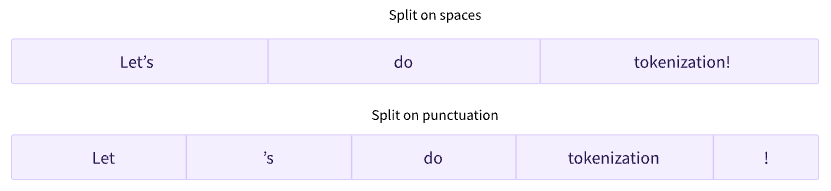

In [ ]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


단어기반 토크나이저로 특정 언어를 완전히 커버하려면, 해당 언어의 모든 단어에 대한 식별자가 필요하고, 이는 엄청난 양의 토큰을 생성합니다.
- 예를 들어, 영어에는 500,000개 이상의 단어가 있으므로 개별 단어에 대한 input ID(입력 식별자)로의 매핑을 구성하기 위해서 그만큼의 식별자들을 감당해야 합니다.
- 게다가, "dog"와 같은 단어는 "dogs"와 같은 단어와 다르게 표현되며, 모델은 처음에는 "dog"와 "dogs"가 유사한 단어들인지 파악하기 어렵습니다.
- 따라서, 두 단어를 관련이 없는 것으로 인식합니다. 이는 "run"과 "running"과 같은 다른 유사한 단어들도 마찬가지 입니다.

마지막으로, 어휘집(vocabulary)에 없는 단어를 표현하기 위해 사용자 정의 토큰이 필요합니다.
- 이는 "unknown" 토큰으로 알려져 있으며, 종종 "[UNK]" 또는 ""로 표시됩니다.
- 토크나이저가 이러한 "unknown" 토큰을 많이 생성한다는 것은 토크나이저가 해당 단어의 합당한 표현(sensible representation)을 찾을 수 없고, 그 과정에서 정보를 잃어버린다는 뜻이므로 나쁜 징조입니다.
- 어휘집(vocabulary)을 만들 때, 토크나이저가 이러한 "unknown" 토큰들을 최대한 적게 출력하게끔 하는 것이 목표가 되어야 합니다.

#### 토크나이저 로딩 및 저장
- 토크나이저를 로드하고 저장하는 것은 모델의 경우처럼 간단합니다.
- 실제로, 모델을 로드하고 저장할 때와 같이, `from_pretrained()` 및 `save_pretrained()` 메서드(method)를 그대로 사용합니다.
- 이들 메서드(method)들은 토크나이저(모델의 아키텍처와 약간 비슷함)와 어휘집(vocabulary, 모델의 가중치(weights)와 비슷함)에서 사용하는 알고리즘을 로드하거나 저장합니다.

`AutoModel` 클래스와 유사하게 `AutoTokenizer` 클래스는 라이브러리에서 체크포인트 이름에 해당하는 토크나이저 클래스를 가져옵니다. 라이브러리 내의 다른 모든 체크포인트와 함께 직접 사용할 수 있습니다.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

토크나이저를 저장하는 것은 모델을 저장하는 것과 동일합니다.

In [ ]:
tokenizer.save_pretrained("saving_folder")

('saving_folder/tokenizer_config.json',
 'saving_folder/special_tokens_map.json',
 'saving_folder/vocab.txt',
 'saving_folder/added_tokens.json',
 'saving_folder/tokenizer.json')

#### 인코딩 (Encoding)
- 텍스트를 숫자로 변환하는(translating text to numbers) 과정을 인코딩(encoding) 이라고 합니다.
- 인코딩(encoding)은 토큰화와 입력 식별자(input IDs)로의 변환이라는 2단계 프로세스로 수행됩니다.
  - 토큰화 프로세스는 토크나이저의 `tokenize()` 메서드에 의해 수행됩니다.
  - 각 토큰들의 입력 식별자(input IDs)로의 변환은 `convert_tokens_to_ids()` 메서드에 의해 처리됩니다.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"

# 토큰화
tokens = tokenizer.tokenize(sequence)
print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [ ]:
# 입력 식별자
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


#### 디코딩 (Decoding)
- 디코딩(decoding)은 반대 방향으로 진행됩니다. 변환된 입력 식별자(input IDs)를 이용해서 어휘집(vocabulary)에서 해당 문자열을 찾습니다. 이것은 다음과 같이 `decode()` 메서드를 사용하여 수행할 수 있습니다.

In [ ]:
decoded_string = tokenizer.decode(ids)

print(decoded_string)

Using a Transformer network is simple


### Model
- 이 섹션에서는 모델을 생성하고 사용하는 방법을 자세히 살펴보겠습니다. 이를 위해, 우리는 지정된 체크포인트(checkpoint)를 바탕으로 모델을 인스턴스화할 때 편리한 `AutoModel` 클래스를 사용할 것입니다.
- `AutoModel` 클래스와 이와 관련된 모든 항목들은 실제로 라이브러리에서 사용할 수 있는 다양한 모델에 대한 단순한 래퍼(wrapper)입니다. 당신이 선택한 체크포인트(checkpoint)에 적합한 모델 아키텍처(model architecture)를 자동으로 추측한 다음 이 아키텍처로 모델을 인스턴스화할 수 있으므로 영리한 래퍼(wrapper)라고 볼 수 있습니다.

#### 트랜스포머 모델 생성하기
- 해당모델은 학습을 하지 않은 상태이다.
- 즉, 사용을 하기 위해서는 충분한 학습을 한 후에 사용을 해야 한다.

In [ ]:
from transformers import BertConfig, BertModel

# config(설정)을 만듭니다.
config = BertConfig()

# 해당 config에서 모델을 생성합니다.
model = BertModel(config)

- 이 설정(configuration) 객체에는 모델을 빌드하는데 필요한 많은 속성이 포함되어 있습니다:
  - `hidden_size` 속성은 hidden_states 벡터의 크기를 정의하고
  - `num_hidden_layers` 는 Transformer 모델의 계층(layers) 수를 정의합니다.

In [ ]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



#### 사전 학습된 Transformer 모델을 로드

- Tokenizer

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


- Model

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Transformer 모듈의 벡터 출력은 일반적으로 규모가 큽니다. 일반적으로 세 가지 차원이 있습니다:
- `배치 크기(Batch size)`: 한 번에 처리되는 시퀀스(sequence)의 개수(위의 예제에서는 2개).
- `시퀀스 길이(Sequence length)`: 시퀀스 숫자 표현의 길이(이 예에서는 16).
- `은닉 크기(Hidden size)`: 각 모델 입력의 벡터 차원.

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


이번에 사용한 예시에서는 시퀀스 분류 헤드(sequence classification head)가 포함되어 있는 모델이 필요합니다(문장을 긍정 또는 부정으로 분류하기 위해서).

따라서 실제로 AutoModel 클래스를 사용하지 않고 대신 `AutoModelForSequenceClassification`를 사용합니다.

In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

두 개의 문장과 두 개의 레이블만 있기 때문에, 모델에서 얻은 결과의 모양(shape)은 2 x 2입니다.

In [ ]:
print(outputs.logits.shape)

torch.Size([2, 2])


In [ ]:
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


- 모델 추론(inference)

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

이제 모델이 아래 내용을 예측했다는 결론을 내릴 수 있습니다:
- `첫번째 문장` : NEGATIVE: 0.0402, POSITIVE: 0.9598
- `두번째 문장` : NEGATIVE: 0.9995, POSITIVE: 0.0005

## [사용가능한 파이프라인](https://fallenangel13th.tistory.com/16)

### `feature-extraction`
- 특징 추출 (텍스트에 대한 벡터 표현 추출)

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("feature-extraction")
result = pipe("hello")
print(result)
```

In [ ]:
from transformers import pipeline
import numpy as np

pipe = pipeline("feature-extraction")
result = pipe("hello")

No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
result

[[[0.3386610746383667,
   0.20652881264686584,
   0.13104639947414398,
   -0.23268352448940277,
   -0.3112504184246063,
   -0.08519081771373749,
   0.21013884246349335,
   -0.059714797884225845,
   0.011692345142364502,
   -1.2519692182540894,
   -0.28962746262550354,
   0.23159219324588776,
   -0.11384620517492294,
   -0.015073816291987896,
   -0.6100555658340454,
   0.24313029646873474,
   -0.059187132865190506,
   0.045462872833013535,
   -0.2847249507904053,
   -0.16145066916942596,
   0.15224015712738037,
   -0.31097403168678284,
   0.5090535283088684,
   -0.21209755539894104,
   0.29451900720596313,
   0.07385792583227158,
   0.28260862827301025,
   0.2442590296268463,
   -0.21124495565891266,
   0.318707674741745,
   0.15378494560718536,
   0.28575924038887024,
   0.06554687768220901,
   0.01698913984000683,
   -0.2352922111749649,
   -0.09367673844099045,
   0.02054392173886299,
   -0.22744186222553253,
   -0.09034925699234009,
   -0.18488790094852448,
   -0.4803803861141205,
 

### `fill-mask`
- 마스크 채우기

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("fill-mask")
result = pipe("A Man is <mask>", top_k=3) #top_k는 가장 확률이 높은 3개 출력
print(result)


[{'score': 0.11967816203832626,
  'token': 23632,
  'token_str': ' Missing',
  'sequence': 'A Man is Missing'},
 {'score': 0.10868901759386063,
  'token': 8912,
  'token_str': ' Born',
  'sequence': 'A Man is Born'},
 {'score': 0.05237989127635956,
  'token': 9088,
  'token_str': ' Dead',
  'sequence': 'A Man is Dead'}]

```

In [ ]:
from transformers import pipeline
import numpy as np

pipe = pipeline("fill-mask")
result = pipe("A Man is <mask>", top_k=3) #top_k는 가장 확률이 높은 3개 출력

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `P

In [ ]:
result

[{'score': 0.11967767030000687,
  'token': 23632,
  'token_str': ' Missing',
  'sequence': 'A Man is Missing'},
 {'score': 0.10868888348340988,
  'token': 8912,
  'token_str': ' Born',
  'sequence': 'A Man is Born'},
 {'score': 0.052379775792360306,
  'token': 9088,
  'token_str': ' Dead',
  'sequence': 'A Man is Dead'}]

### `ner`
- 개체명 인식 (named entity recognition)

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("ner", grouped_entities=True) #grouped_entities=True 같은 개체 그룹화
result = pipe("Dokdo is a unique territory of Korea.")

#출력
print(result)
[{'entity_group': 'LOC',
  'score': 0.9633191,
  'word': 'Dokdo',
  'start': 0,
  'end': 5},
 {'entity_group': 'LOC',
  'score': 0.9983676,
  'word': 'Korea',
  'start': 31,
  'end': 36}]
```

In [ ]:
from transformers import pipeline
import numpy as np

pipe = pipeline("ner", grouped_entities=True) #grouped_entities=True 같은 개체 그룹화
result = pipe("Dokdo is a unique territory of Korea.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
result

[{'entity_group': 'LOC',
  'score': 0.9633191,
  'word': 'Dokdo',
  'start': 0,
  'end': 5},
 {'entity_group': 'LOC',
  'score': 0.9983676,
  'word': 'Korea',
  'start': 31,
  'end': 36}]

### `question-answering`
- 질의 응답

```python
from transformers import pipeline

result = pipeline("question-answering", model="klue/roberta-base") #모델명은 허깅페이스에서 검색하여 제목 그대로 사용
result(
    question="베토벤이 태어난 곳은 어디인가요?",
    context="루트비히 판 베토벤은 독일의 서양 고전 음악 작곡가이자 피아니스트이다. 독일의 본에서 태어났으며, 성인이 된 이후 거의 오스트리아 빈에서 살았다. 감기와 폐렴의 합병증으로 투병하다가 57세로 세상을 떠난 그는 고전주의와 낭만주의의 전환기에 활동한 주요 음악가이며, 종종 영웅적인 인물로도 묘사된다. 음악의 성인 즉 악성이라는 별칭으로도 불린다.."
)

#출력
{'score': 0.00026570854242891073,
 'start': 40,
 'end': 53,
 'answer': '독일의 본에서 태어났으며'}
```

In [ ]:
from transformers import pipeline

result = pipeline("question-answering", model="klue/roberta-base") #모델명은 허깅페이스에서 검색하여 제목 그대로 사용
result(
    question="베토벤이 태어난 곳은 어디인가요?",
    context="루트비히 판 베토벤은 독일의 서양 고전 음악 작곡가이자 피아니스트이다. 독일의 본에서 태어났으며, 성인이 된 이후 거의 오스트리아 빈에서 살았다. 감기와 폐렴의 합병증으로 투병하다가 57세로 세상을 떠난 그는 고전주의와 낭만주의의 전환기에 활동한 주요 음악가이며, 종종 영웅적인 인물로도 묘사된다. 음악의 성인 즉 악성이라는 별칭으로도 불린다.."
)

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.000315443379804492,
 'start': 31,
 'end': 66,
 'answer': '피아니스트이다. 독일의 본에서 태어났으며, 성인이 된 이후 거의'}

### `sentiment-analysis`
- 감정 분석

```python
from transformers import pipeline

pipe = pipeline("sentiment-analysis")
pipe(['I am King in the world'])

#출력
[{'label': 'POSITIVE', 'score': 0.999794065952301}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline("sentiment-analysis")
pipe(['I am King in the world'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.999794065952301}]

### `summarization`
- 요약

```python
from transformers import pipeline

pipe = pipeline("summarization")
pipe( """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
""")

#출력
[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. does . Rapidly developing economies such as China continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline("summarization")
pipe( """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
""")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. does . Rapidly developing economies such as China continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]

### `text-generation`
- 텍스트 생성

```python
from transformers import pipeline

pipe = pipeline("text-generation", model="skt/kogpt2-base-v2", max_length=30)
pipe("나는 오늘 저녁에 밥을 먹고")

#출력
[{'generated_text': '나는 오늘 저녁에 밥을 먹고\n어디로 가는지부터 고민의 연속이다.\n그렇다면 나흘 동안 어디를 가고 그리고 어디로 가야 할까요?\n'}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline("text-generation", model="skt/kogpt2-base-v2", max_length=30)
pipe("나는 오늘 저녁에 밥을 먹고")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': '나는 오늘 저녁에 밥을 먹고 난 뒤 아침에 바로 이 시간부터 바로 일을 시작하도록 허락했습니다. 그리고 어제와 마찬가지로 오늘도 함께 일하고 하루 일을 끝'}]

### `translation`
- 번역

```python
from transformers import pipeline

pipe = pipeline("translation", model="circulus/kobart-trans-ko-en-v2")
pipe("오늘 점심으로 스테이크를 먹었습니다.")

#출력
[{'translation_text': 'I had steak for lunch today'}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline("translation", model="circulus/kobart-trans-ko-en-v2")
pipe("오늘 점심으로 스테이크를 먹었습니다.")

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/304 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'translation_text': 'I had steak for lunch today'}]

### `zero-shot-classification`
- 제로샷 분류

```python
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="hyunwoongko/kobart")
classifier(
    "개구리는 양서류이다.",
    candidate_labels=["교육", "정치", "사업"],
)

#출력
{'sequence': '개구리는 양서류이다.',
 'labels': ['사업', '정치', '교육'],
 'scores': [0.38976219296455383, 0.3134584426879883, 0.2967793345451355]}
```

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="hyunwoongko/kobart")
classifier(
    "개구리는 양서류이다.",
    candidate_labels=["교육", "정치", "사업"],
)

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at hyunwoongko/kobart and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/109 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': '개구리는 양서류이다.',
 'labels': ['사업', '교육', '정치'],
 'scores': [0.36304613947868347, 0.3408980369567871, 0.2960558533668518]}

# 사전학습 모델에 대한 미세조정

## 세션 다시 시작

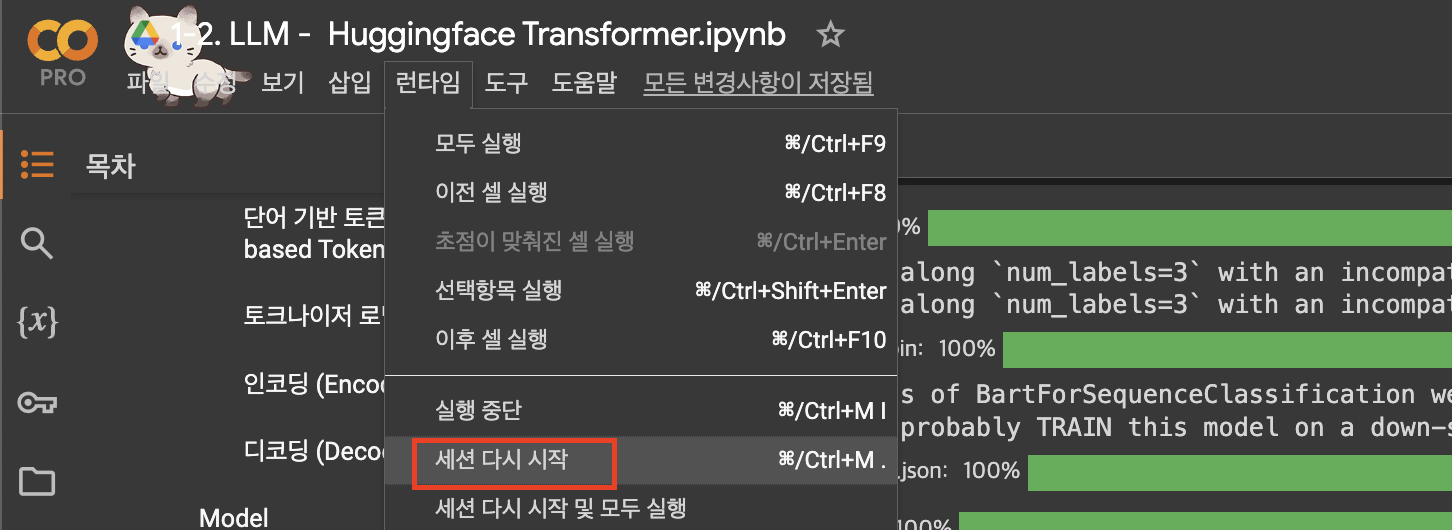

In [ ]:
!pip install datasets transformers

## 데이터셋 로드

- [MRPC 벤치마크 데이터셋](https://ifdean.tistory.com/3)
  - 학습(training), 검증(validation) 및 평가(test) 집합이 저장된 DatasetDict 객체를 얻을 수 있습니다.
  - 이들 각각은 여러 종류의 열(columns)(sentence1, sentence2, label 및 idx)과 행(row)의 개수를 포함하는데, 여기서 행(row)의 개수는 각 집합의 문장쌍의 개수를 나타냅니다.
  - 따라서, 학습 집합(training set)에는 3,668개의 문장 쌍, 검증 집합(validation set)에는 408개, 평가 집합(test set)에는 1,725개의 문장 쌍이 있습니다.

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

- 파이썬의 딕셔너리(dictionary)와 같이 키값으로 raw_datasets 개체의 개별 집합(학습, 검증, 평가)에 접근할 수 있습니다:

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

- 위의 예에서 보듯이, 레이블(label)이 이미 정수(integers)라서 전처리(preprocessing)가 필요 없습니다.
- 어떤 정수가 어떤 레이블에 해당하는지 파악하기 위해서는 raw_train_dataset의 features 속성을 살펴보면 됩니다.

세부적으로, 레이블(label)은 ClassLabel 타입이고 레이블 이름에 대한 정수 매핑은 names 폴더에 저장되어 있습니다. 0은 not_equivalent를 의미하고, 1은 equivalent를 나타냅니다.

In [ ]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

## 데이터셋 전처리

In [ ]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer("This is the first sentence.", "This is the second one.")
inputs

{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

input_ids 내부의 ID들을 다시 단어로 디코딩하면:

In [ ]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

## 토크나이저 처리

- 아래 방법은 잘 작동하지만, `input_ids`, `attention_mask`, `token_type_ids` 및 데이터가 담겨진 다차원 리스트가 키로 지정된 `tokenized_dataset` 이라는 별도의 파이썬 딕셔너리를 반환하는 단점이 있습니다.
- 또한 이 방법은 토큰화하는 동안 전체 데이터셋을 저장할 충분한 공간의 `RAM`이 있는 경우에만 작동합니다.

In [ ]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True, # 패딩
    truncation=True, # 절단
)

- 특정 데이터를 `dataset` 객체로 유지하기 위해 `Dataset.map()` 메서드를 사용합니다.
- 이 방법은 토큰화(tokenization) 외에 더 많은 전처리가 필요한 경우 유연성을 발휘합니다.
- `map()` 메서드는 데이터셋의 개별 요소에 함수(function)를 적용하여 작동하므로 입력을 토큰화하는 함수를 정의해 보겠습니다:

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

- 동적 패딩(Dynamic padding)
  - 마지막으로 해야 할 일은 전체 요소들을 배치(batch)로 분리할 때 가장 긴 요소의 길이로 모든 예제를 채우는(padding) 것입니다. 이를 동적 패딩(dynamic padding)이라고 합니다.
  - 배치(batch)로 분리하려는 데이터셋의 요소 각각에 대해서 정확한 수의 패딩(padding)을 적용할 수 있는 콜레이트 함수(collate function)를 정의해야 합니다. 다행히도, 🤗Transformers 라이브러리는 DataCollatorWithPadding을 통해 이러한 기능을 제공합니다.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

- 이 새로운 함수를 테스트하기 위해 학습집합에서 배치(batch)로 묶을 몇개의 샘플들을 가져오겠습니다.
- 여기서는 필요하지도 않을 뿐더러 심지어 문자열까지도 포함하는 idx, sentence1 및 sentence2 열을 제거합니다(문자열로는 텐서를 생성할 수 없습니다).

아래에서 배치(batch) 내의 각 요소들의 길이를 살펴보세요:

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]

- 당연히, 32에서 67까지 다양한 길이의 샘플을 얻을 수 있습니다.
- 동적 패딩(dynamic padding)은 이 배치(batch) 내의 모든 샘플들이 배치 내부에서 최대 길이인 67 길이로 패딩(padding)되어야 함을 의미합니다.
- 동적 패딩(dynamic padding)이 없으면 모든 샘플들은 전체 데이터셋의 최대 길이 또는 모델이 허용할 수 있는 최대 길이로 채워져야 합니다.

data_collator가 동적으로 배치(batch)를 적절하게 패딩(padding)하는지 다시 확인합시다:

In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'attention_mask': torch.Size([8, 67]),
 'labels': torch.Size([8])}

## TrainingArguments 정의
- Trainer를 정의하기 전에 먼저 수행할 단계는 Trainer가 학습 및 평가에 사용할 모든 하이퍼파라미터(hyperparameters)를 포함하는 TrainingArguments 클래스를 정의하는 것입니다.
- 여기서 우리가 제공해야 할 유일한 매개변수는 학습된 모델이 저장될 디렉토리입니다.
- 나머지는 모두 기본값(default values)을 그대로 활용하면 됩니다. 기본적인 미세 조정(fine-tuning)에는 이 정도면 충분합니다.



In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=no,
evaluation_strategy=None,
fp16=False,
fp16_backend=auto,
fp16

## 모델 정의
- 두 번째 단계는 모델을 정의하는 것입니다. 두 개의 레이블이 있는 `AutoModelForSequenceClassification` 클래스를 사용합니다.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Trainer 정의
- 모델(model), training_args, 학습집합 및 검증집합, data_collator 및 토크나이저 등, 지금까지 구성된 모든 개체를 전달하여 Trainer를 정의할 수 있습니다

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

## fine-tuning(미세 조정)
미세 조정이 시작되고(GPU에서 몇 분 정도 소요됨) 500단계마다 학습 손실(training loss)이 보고됩니다. 그러나 모델의 성능이 좋은지 혹은 나쁜지는 알려주지 않습니다. 그 이유는 다음과 같습니다:
- 학습 과정에서 평가가 수행되도록 `Trainer`에게 `evaluation_strategy` 매개변수를 "steps"(매 eval_steps마다 평가)나 "epoch"(각 epoch 마지막에 평가) 등으로 지정하지 않았습니다.
- 평가 방법 혹은 평가 척도를 정의한 `compute_metrics()` 함수를 `Trainer`에 지정하지 않았습니다. 평가 방법 지정이 안된 상태에서는 평가 과정에서 손실(loss)을 출력했을 것입니다. 직관적인 값은 아니지요.

In [ ]:
trainer.train()

Step,Training Loss
500,0.499200
1000,0.237800


TrainOutput(global_step=1377, training_loss=0.2985324097787806, metrics={'train_runtime': 121.9742, 'train_samples_per_second': 90.216, 'train_steps_per_second': 11.289, 'total_flos': 405114969714960.0, 'train_loss': 0.2985324097787806, 'epoch': 3.0})

## 평가(Evaluation)
- `predict()` 메서드의 출력은 3개의 필드(`predictions`, `label_ids` 및 `metrics`)가 있는 또 다른 네임드튜플(named tuple)입니다.
- `metrics` 필드에는 전달된 데이터셋의 손실(loss)과 시간 메트릭(time metrics) 값만 포함됩니다. 시간 메트릭(time metrics)은 예측에 걸린 전체 및 평균 시간을 나타냅니다.

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(408, 2) (408,)


- 보시다시피 `predictions`은 모양이 408 x 2인 2차원 배열입니다.
- 408은 우리가 예측에 사용한 데이터셋의 요소 개수입니다. 이는 우리가 `predict()`에 전달한 데이터셋의 각 요소에 대한 `로짓(logit)`값들입니다.
- 이 로짓(logit)값들을 레이블과 비교할 수 있는 예측 결과로 변환하려면 두 번째 축(second axis)에 존재하는 항목에서 최대값이 있는 인덱스를 가져와야 합니다:

In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
from datasets import load_metric

metric = load_metric("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

<ipython-input-21-fd7f878c23e3>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue", "mrpc")


The repository for glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/glue.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'accuracy': 0.8455882352941176, 'f1': 0.8934010152284263}

## compute_metrics() 생성

In [ ]:
def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

- `evaluation_strategy` 매개변수가 "epoch"으로 설정되고 새로운 TrainingArguments와 모델을 생성합니다.
  - 그렇지 않으면 이미 앞에서 학습된(fine-tuned) 모델의 학습을 계속해서 수행할 것입니다. 새로운 학습 실행을 시작하기 위해 다음을 실행합니다.
- 각 에포크(epoch)가 끝날 때 메트릭(metrics)을 출력하도록 하기 위해서, `compute_metrics()` 함수를 사용하여 새 Trainer를 정의하는 방법을 아래 코드에서 보여주고 있습니다.

In [ ]:
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.486698,0.764706,0.851393
2,0.589400,0.453186,0.828431,0.876325
3,0.385500,0.614698,0.840686,0.887737


TrainOutput(global_step=1377, training_loss=0.42540089947292575, metrics={'train_runtime': 127.6412, 'train_samples_per_second': 86.21, 'train_steps_per_second': 10.788, 'total_flos': 405114969714960.0, 'train_loss': 0.42540089947292575, 'epoch': 3.0})